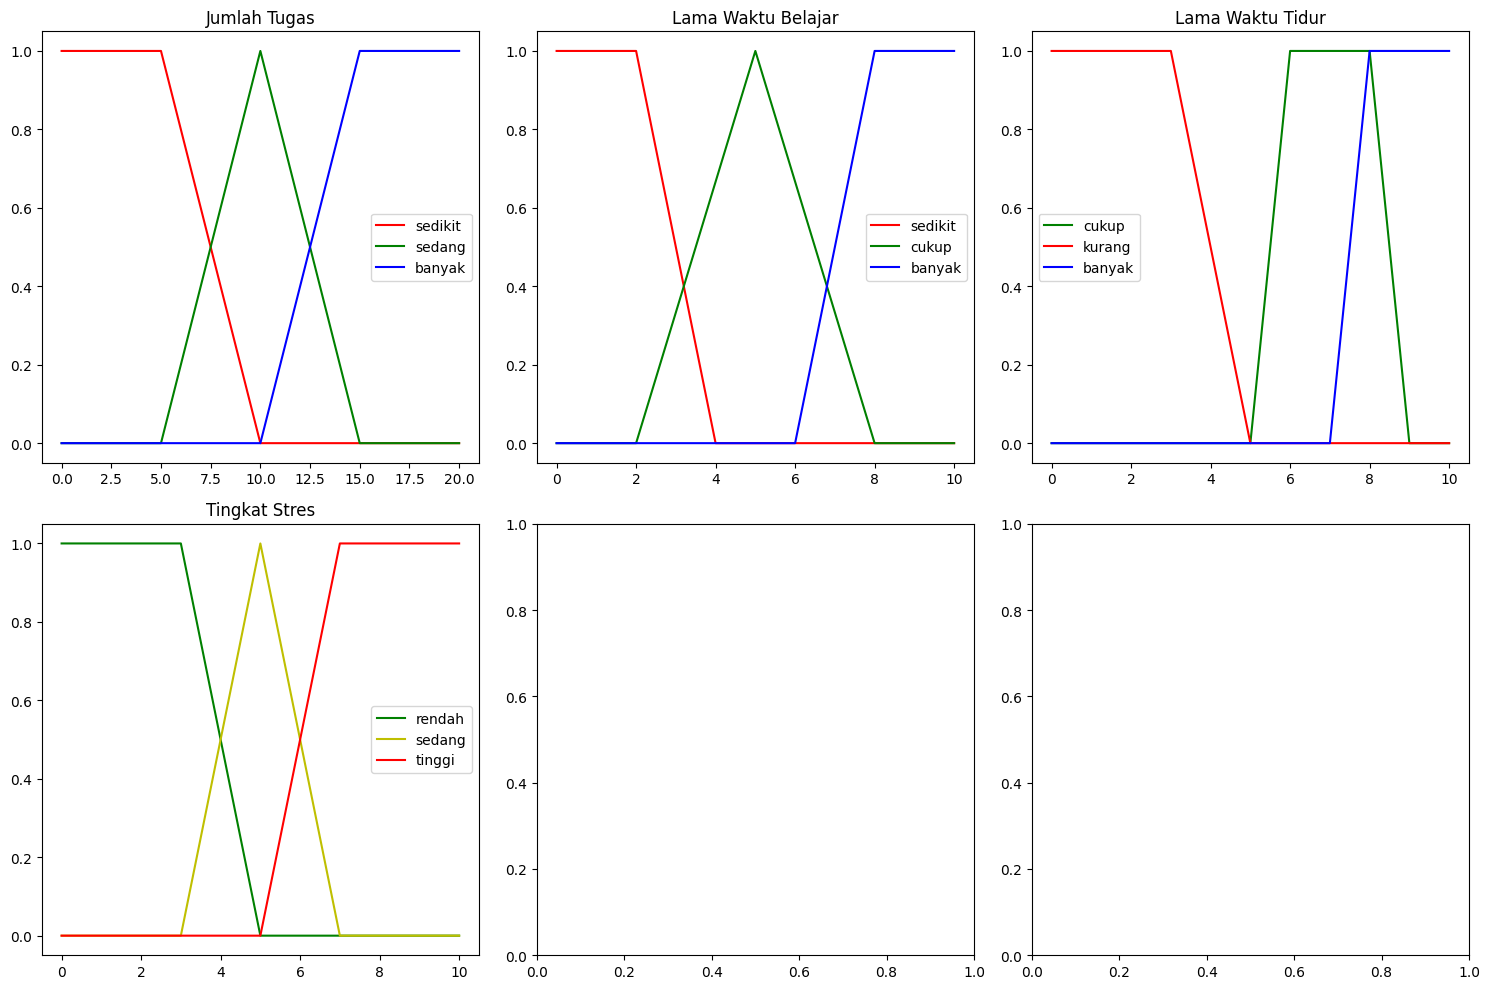

UnboundLocalError: cannot access local variable 'tugas_sedang' where it is not associated with a value

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Fuzzifikasi untuk jumlah tugas
x_tugas = np.arange(0, 21, 1)  # Jumlah tugas dari 0 hingga 20
tugas_sedikit = fuzz.trapmf(x_tugas, [0, 0, 5, 10])
tugas_sedang = fuzz.trimf(x_tugas, [5, 10, 15])
tugas_banyak = fuzz.trapmf(x_tugas, [10, 15, 20, 20])

# 2. Fuzzifikasi untuk lama waktu belajar
x_belajar = np.arange(0, 11, 1)  # Lama belajar dalam jam
belajar_sedikit = fuzz.trapmf(x_belajar, [0, 0, 2, 4])
belajar_cukup = fuzz.trimf(x_belajar, [2, 5, 8])
belajar_banyak = fuzz.trapmf(x_belajar, [6, 8, 10, 10])

# 3. Fuzzifikasi untuk lama waktu tidur
x_tidur = np.arange(0, 11, 1)  # Lama tidur dalam jam
tidur_cukup = fuzz.trapmf(x_tidur, [5, 6, 8, 9])
tidur_kurang = fuzz.trapmf(x_tidur, [0, 0, 3, 5])
tidur_banyak = fuzz.trapmf(x_tidur, [7, 8, 10, 10])

# 4. Fuzzifikasi untuk tingkat stres
x_stres = np.arange(0, 11, 1)  # Tingkat stres dari 0 (rendah) hingga 10 (tinggi)
stres_rendah = fuzz.trapmf(x_stres, [0, 0, 3, 5])
stres_sedang = fuzz.trimf(x_stres, [3, 5, 7])
stres_tinggi = fuzz.trapmf(x_stres, [5, 7, 10, 10])

# 5. Plotting keanggotaan
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot Jumlah Tugas
axs[0, 0].plot(x_tugas, tugas_sedikit, 'r', label='sedikit')
axs[0, 0].plot(x_tugas, tugas_sedang, 'g', label='sedang')
axs[0, 0].plot(x_tugas, tugas_banyak, 'b', label='banyak')
axs[0, 0].set_title('Jumlah Tugas')
axs[0, 0].legend()

# Plot Lama Waktu Belajar
axs[0, 1].plot(x_belajar, belajar_sedikit, 'r', label='sedikit')
axs[0, 1].plot(x_belajar, belajar_cukup, 'g', label='cukup')
axs[0, 1].plot(x_belajar, belajar_banyak, 'b', label='banyak')
axs[0, 1].set_title('Lama Waktu Belajar')
axs[0, 1].legend()

# Plot Lama Waktu Tidur
axs[0, 2].plot(x_tidur, tidur_cukup, 'g', label='cukup')
axs[0, 2].plot(x_tidur, tidur_kurang, 'r', label='kurang')
axs[0, 2].plot(x_tidur, tidur_banyak, 'b', label='banyak')
axs[0, 2].set_title('Lama Waktu Tidur')
axs[0, 2].legend()

# Plot Tingkat Stres
axs[1, 0].plot(x_stres, stres_rendah, 'g', label='rendah')
axs[1, 0].plot(x_stres, stres_sedang, 'y', label='sedang')
axs[1, 0].plot(x_stres, stres_tinggi, 'r', label='tinggi')
axs[1, 0].set_title('Tingkat Stres')
axs[1, 0].legend()

plt.tight_layout()
plt.show()

# 6. Fungsi Inferensi Tsukamoto untuk tingkat stres
def tsukamoto(jumlah_tugas, lama_belajar, lama_tidur):
    # Fuzzifikasi input
    tugas_sed = fuzz.interp_membership(x_tugas, tugas_sedikit, jumlah_tugas)
    tugas_sedang = fuzz.interp_membership(x_tugas, tugas_sedang, jumlah_tugas)
    tugas_bnyk = fuzz.interp_membership(x_tugas, tugas_banyak, jumlah_tugas)

    belajar_sed = fuzz.interp_membership(x_belajar, belajar_sedikit, lama_belajar)
    belajar_cukup = fuzz.interp_membership(x_belajar, belajar_cukup, lama_belajar)
    belajar_banyak = fuzz.interp_membership(x_belajar, belajar_banyak, lama_belajar)

    tidur_cukup = fuzz.interp_membership(x_tidur, tidur_cukup, lama_tidur)
    tidur_kurang = fuzz.interp_membership(x_tidur, tidur_kurang, lama_tidur)
    tidur_banyak = fuzz.interp_membership(x_tidur, tidur_banyak, lama_tidur)

    # Aturan Fuzzy
    r1 = np.fmin(tugas_bnyk, np.fmin(belajar_banyak, tidur_kurang))  # Banyak tugas, banyak belajar, kurang tidur -> stres tinggi
    z1 = 9 * r1

    r2 = np.fmin(tugas_bnyk, np.fmin(belajar_cukup, tidur_cukup))  # Banyak tugas, cukup belajar, cukup tidur -> stres sedang
    z2 = 7 * r2

    r3 = np.fmin(tugas_sed, np.fmin(belajar_sed, tidur_banyak))  # Sedikit tugas, sedikit belajar, banyak tidur -> stres rendah
    z3 = 3 * r3

    # Hitung output berdasarkan rata-rata berbobot
    numerator = (z1 + z2 + z3)
    denominator = (r1 + r2 + r3)

    if denominator == 0:
        return 0  # Mencegah pembagian dengan nol
    return numerator / denominator

# 7. Contoh perhitungan
jumlah_tugas = 15
lama_belajar = 6
lama_tidur = 5

hasil_stres = tsukamoto(jumlah_tugas, lama_belajar, lama_tidur)
print(f"Tingkat stres untuk jumlah tugas {jumlah_tugas}, lama belajar {lama_belajar} jam, dan lama tidur {lama_tidur} jam adalah {hasil_stres:.2f}")
